# Задание 1

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [1]:
def qZ(x, y, var):
    if var == 0:
        return (x-3*y+1)/(3*x**2+3*y**2+1)
    elif var == 1:
        return (x-2*y-3)/(x*x+3*y**2+1)
    elif var == 2:
        return (x-3*y-2)/(x**2+y**2+1)
    elif var == 3:
        return (x+3*y)/(3*x**2+y**2+1)
    elif var == 4:
        return (x-3*y+1)/(3*x**2+y**2+1)
    elif var == 5:
        return (x+3*y)/(x**2+y**2+1)
    elif var == 6:
        return (x+3*y-3)/(3*x**2+y**2+1)
    elif var == 7:
        return (x-3*y-3)/(x**2+2*y**2+1)
    elif var == 8:
        return (x-2*y)/(x**2+y**2+1)
    elif var == 9:
        return (x - 3*y) / (2*x**2 + 2*y**2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchange_scheme(old_x, old_y, sorted_id):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = old_x[sorted_id[2]]
    X[3] = old_x[sorted_id[2]]


    X[0] = old_x[sorted_id[0]]

    X[1] = old_x[sorted_id[1]]

    Y[0] = old_y[sorted_id[2]]
    Y[1] = old_y[sorted_id[2]]


    Y[2] = old_y[sorted_id[0]]

    Y[3] = old_y[sorted_id[1]]

    return X, Y

def sorting(Z):
    sorted_id = sorted(range(len(Z)), key = lambda k: Z[k])

    return sorted_id

def evo_step(X, Y, Z):
    _, min_id = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(min_id)
    Y.pop(min_id)
    Z.pop(min_id)

    return X, Y, Z

def evo_steps(X, Y, var, steps_num = 4):
    results = []

    for i in range(4):
        arr_z = [qZ(x, Y[i], var) for i, x in enumerate(X)]

        X, Y, Z = evo_step(X, Y, arr_z)

        X, Y = exchange_scheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arr_z), arr_z])

    return X, Y, results

In [9]:
vars = [[[-2,-1,0,1],[-2,-1,0,1]],[[-4,-2,0,2],[-1,1,0,-2]],[[-1,0,2,3],[-2,1,0,-1]],[[-1,0,2,4],[-2,1,-1,0]],[[-2,-1,0,2],[-2,0,-1,1]],
        [[-5,-3,-2,-1],[-1,-2,0,1]],[[-5,-3,-2,0],[-1,-2,0,1]],[[-5,-3,-2,-1],[-1,-2,0,1]],[[-1,0,2,3],[0,-1,-2,1]],[[-1, 0, 2, 3],[0, 1, -2, 2]]]

for j in range(0, len(vars)):
    results = evo_steps(vars[j][0], vars[j][1], j)

    print("Вариант", j+1)
    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')

    quality_arr_z = []

    for i in range(len(results[2])):
        quality_arr_z += results[2][i][3]

    print(f'max Z: {max(quality_arr_z)}')

Вариант 1
max_1_step: 0.23529411764705876
max_2_step: 1.2121212121212122
max_3_step: 2.1575757575757577
max_4_step: 3.0666666666666664
max Z: 1.0
Вариант 2
max_1_step: -0.01252864782276547
max_2_step: 1.3922148312392215
max_3_step: 1.9411764705882353
max_4_step: 2.242424242424242
max Z: 1.0
Вариант 3
max_1_step: -0.037518037518037506
max_2_step: 0.8705882352941177
max_3_step: 1.71301247771836
max_4_step: 1.8502673796791442
max Z: 0.47058823529411764
Вариант 4
max_1_step: 0.03030303030303033
max_2_step: 1.29281045751634
max_3_step: 1.6019013666072488
max_4_step: 1.8502673796791442
max Z: 0.47058823529411764
Вариант 5
max_1_step: 0.8110516934046346
max_2_step: 0.21212121212121204
max_3_step: 2.7058823529411766
max_4_step: 3.121212121212121
max Z: 1.0
Вариант 6
max_1_step: -0.948846960167715
max_2_step: 0.09434853334732646
max_3_step: 0.4542634722096337
max_4_step: 0.6726084373143197
max Z: 0.23529411764705882
Вариант 7
max_1_step: -1.148846960167715
max_2_step: 0.09434853334732646
max_3_

# Задание 2

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.


In [9]:
import networkx as nx
from math import e

In [10]:
#Вариант 1

distances = [
    (1, 2, 26),
    (1, 3, 42),
    (1, 4, 44),
    (1, 5, 31),
    (1, 6, 24),
    (2, 3, 20),
    (2, 4, 34),
    (2, 5, 40),
    (2, 6, 15),
    (3, 4, 23),
    (3, 5, 43),
    (3, 6, 20),
    (4, 5, 27),
    (4, 6, 22),
    (5, 6, 26)]

V = [1, 2, 3, 4, 5, 6, 1]
Z = [(3, 4),
    (4, 6),
    (5, 6),
    (6, 2)]
P = [90, 45, 43, 31]

T = 100

def probability(delta, T):
    return 100 * e **(-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

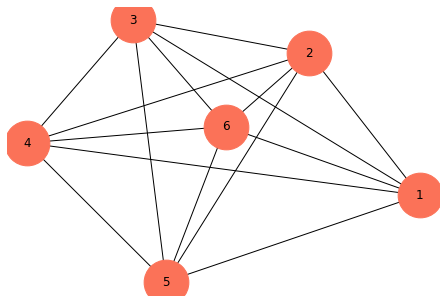

In [12]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 3, 6, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [146, 176, 163, 146, 176]


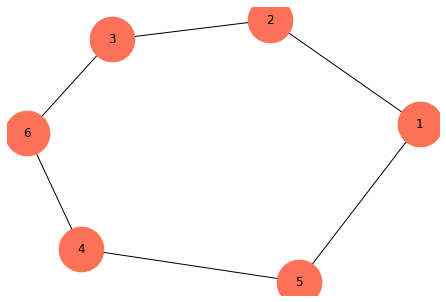

In [13]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)


    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)